In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
from utils import *

%load_ext autoreload

%autoreload 2

In [30]:
df = loadData()
qdf,ppc = qualtoquan(df)
X = qdf.drop(columns=['price'])
Y= qdf['price']
X_train, X_test, y_train, y_test = scaledTrainTestSplit(qdf)

Mutual Information
carat: 1.6491091041573287
cut: 0.05792607828012519
color: 0.13930501153622732
clarity: 0.21588932665295912
depth: 0.03131271334160157
table: 0.03125044545382849
x: 1.4137010753493788
y: 1.4197435060920256
z: 1.3597784530246901
___________________________________________
F Scores
carat: 272758.97266818036
cut: 137.9535744761462
color: 1458.7870695181666
clarity: 1080.276912388072
depth: 8.54024205702197
table: 806.3560927662471
x: 174734.77905014122
y: 168801.49999648237
z: 138127.18554109836


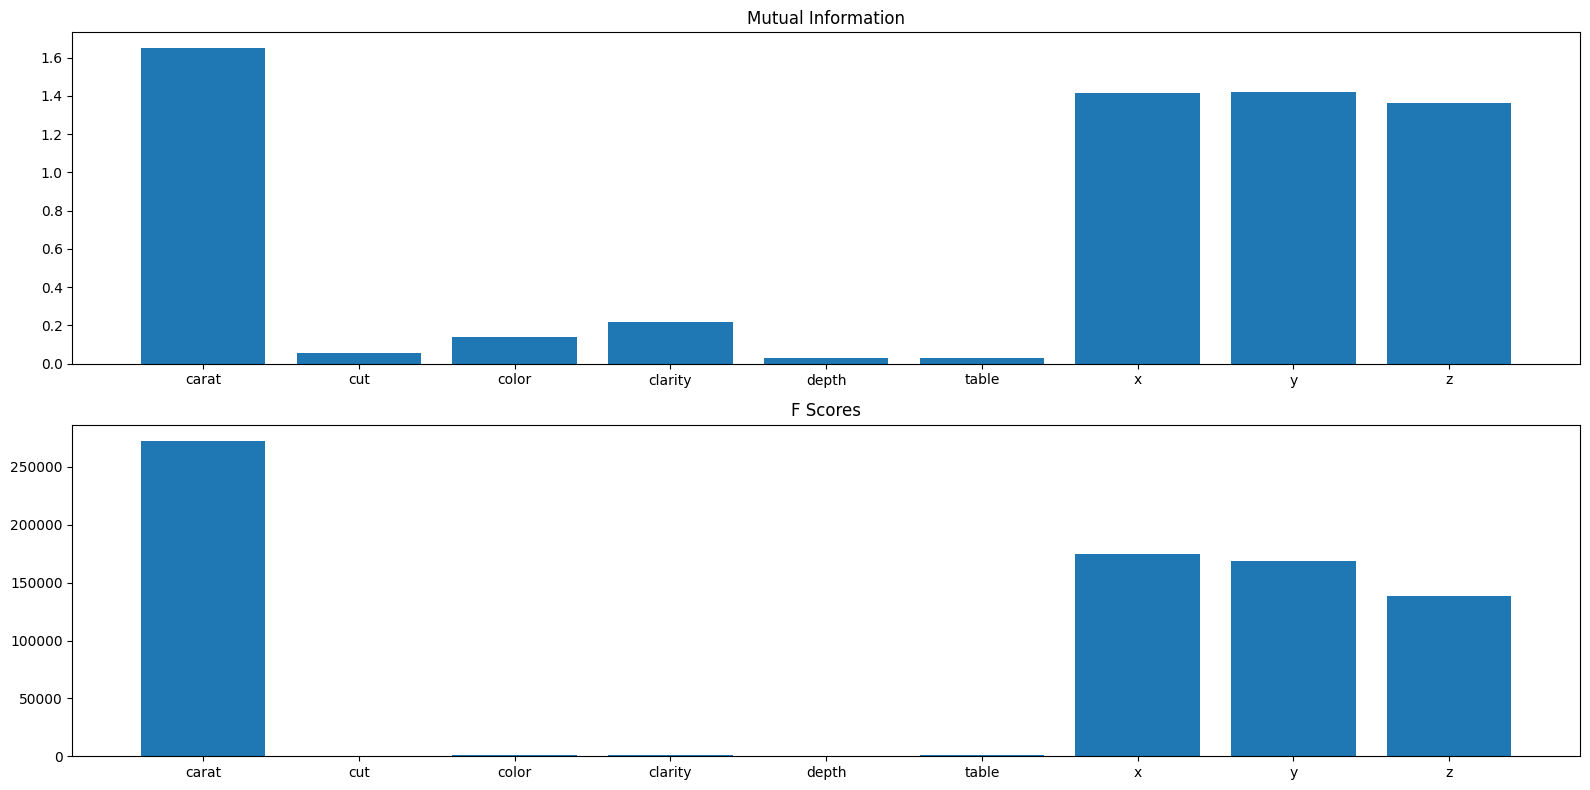

In [3]:
f1,f2, trimX_train, trimX_test = \
    plotMutualInformation(X_train, X_test, y_train)

It is clear by observation that smallest mutual information is present in depth and table. However, it is important to note that cut is also extremely small. 

In [18]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC

In [28]:
lasso = linear_model.LinearRegression()

cv_results = cross_validate(lasso, X, Y, cv=10)

In [45]:
kf = KFold(n_splits=10, shuffle=False)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    X_train, y_train = X[train_index, :], y[train_index]
    X_test, y_test = X[test_index, :], y[test_index]

    X_train, X_test = scaleTrainTest(X_train, X_test)
    


Fold 0:
Fold 1:
Fold 2:
Fold 3:
Fold 4:
Fold 5:
Fold 6:
Fold 7:
Fold 8:
Fold 9:


In [29]:
print(cv_results['test_score'])

[ -0.09156129   0.38713506   0.46834974   0.60425337   0.54567067
   0.91262075 -34.74113945 -13.60782947  -1.70904947  -0.60787456]
